## TP1 : Voyageur de commerce

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

Un voyageur de commerce doit visiter $n$ villes au cours de sa tournée numérotées $0,\ldots,n-1$.
Ces villes sont définies par leurs coordonnées géographiques $(x_i,y_i)$. Un parcours consiste à
affecter un ordre à chaque ville :
ordre $i \rightarrow s(i) ∈ 0..n-1$
sous la contrainte que chaque ville doit être visitée une fois et une seule. (autrement dit, $s$ est une
permutation de $(0,\ldots,n-1)$ ⇒ $n!$ solutions). Le coût d’une solution s est : $$J(s) =
\sum_{i=0}^{n-2} d(s(i),s(i+1)) + d(s(n-1), s(0))$$ avec: $$d(s(i), s(j)) = \sqrt{(x_{s(i)} - x_{s(j)})^2
+ (y_{s(i)} - y_{s(j)})^2}$$
Le problème d’optimisation consiste à minimiser la distance totale.

In [2]:
import math 

In [24]:
class ProbVC:
    def __init__(self, cities):
        self.cities = cities
        self.n = len(cities)
        self.dist = [[0] * self.n for i in range(self.n)]
        for i in range(self.n):
            for j in range(i, self.n):
                self.dist[i][j] =  math.sqrt((cities[i][0] - cities[j][0]) ** 2 + (cities[i][1] - cities[j][1]) ** 2)
                self.dist[j][i] = math.sqrt((cities[i][0] - cities[j][0]) ** 2 + (cities[i][1] - cities[j][1]) ** 2)

    def display(self,sol):
        plt.figure(figsize=(8, 8))
        
        plt.plot([self.cities[i][0] for i in sol], [self.cities[i][1] for i in sol], '-o')
        plt.show()
    
    def plot_cities(self):
        x = []
        y = []
        for city in self.cities:
            x.append(city[0])
            y.append(city[1])
        plt.plot(x,y,'ro')
        plt.show()
    
    def randomNeighbor(self, s):
        n = len(s)
        i = random.randint(0, n - 1)
        j = random.randint(0, n - 1)
        if i == j:
            return self.randomNeighbor(s)
        s[i], s[j] = s[j], s[i]
        return s

    def allNeighbors(self,s):
        neighbors = []
        for i in range(self.n):
            for j in range(i, n): # double boucle pour parcourir tout les villes
                neighbor = s.copy()
                neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
                neighbors.append(neighbor)
                #print(neighbors)
        return neighbors

    def J(self,s):
        """
        Returns the value of the function J for the solution s and the problem p.
        """
        J = 0
        for i in range(len(s)-1):
            J += p.dist[i][i + 1]
        J += p.dist[-1][0]
        #print(J)
        return J
    
    def argmin_J(self):
        min_J = self.J()
        min_s = s
        for neighbor in self.allNeighbors(s):
            if self.J(neighbor, p) < min_J:
                min_J = self.J(neighbor, p)
                min_s = neighbor
        return min_s


In [4]:
def list_cities(n):
    list_of_element = []
    for i in range(n):
        y = random.uniform(0, 100)
        x = random.uniform(0, 100)
        list_of_element.append([x,y])
    return list_of_element


In [25]:
n=10
a = list_cities(n)
prob= ProbVC(a)

In [6]:
randomsol = random.sample(range(0, len(a)), len(a))

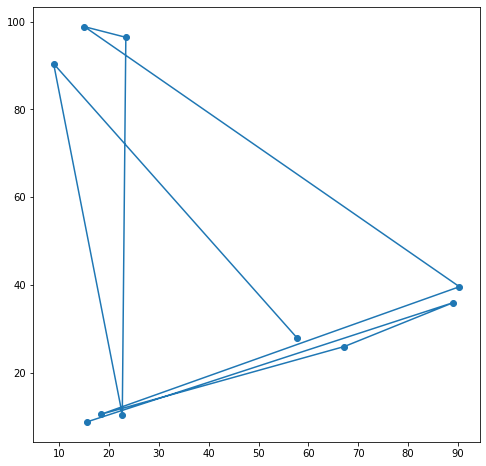

In [7]:
prob.display(randomsol)

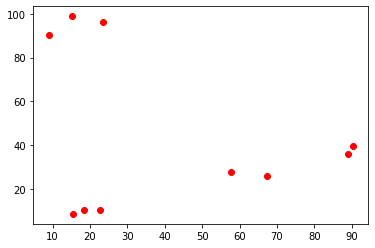

In [8]:
prob.plot_cities()

In [9]:
## Class containing all utilities to solve a tsp problem

In [10]:
class solver:
    def __init__(self, p):
        self.p = p

    def randomNeighbor(self, s):
        n = len(s)
        i = random.randint(0, n - 1)
        j = random.randint(0, n - 1)
        if i == j:
            return self.randomNeighbor(s)
        s[i], s[j] = s[j], s[i]
        return s

    def allNeighbors(self, s):
        n = len(s)
        neighbors = []
        for i in range(n):
            for j in range(i, n): # double boucle pour parcourir tout les villes
                neighbor = s.copy()
                neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
                neighbors.append(neighbor)
                #print(neighbors)
        return neighbors

    def J(self, s, p):
        """
        Returns the value of the function J for the solution s and the problem p.
        """
        J = 0
        for i in range(len(s)-1):
            J += p.dist[i][i + 1]
        J += p.dist[-1][0]
        #print(J)
        return J
    
    def argmin_J(self, s, p):
        min_J = self.J(s, p)
        min_s = s
        for neighbor in self.allNeighbors(s):
            if self.J(neighbor, p) < min_J:
                min_J = self.J(neighbor, p)
                min_s = neighbor
        return min_s


In [12]:
"""
Write a class TSP that solves the TSP problem using the Solver class, using monte carlo algorithm
"""
class TSP:
    def __init__(self, prob, solver):
        self.prob = prob
        self.solver = solver

    def montecarlo(self, nb_iter):
        """
        Returns the best solution found after nb_iter iterations of the solver.
        """
        best_J = 1000
        print(best_J)
        for i in range(nb_iter):    
            sol = random.sample(range(0, len(self.prob.cities)), len(self.prob.cities))            
            #print(sol)
            J = self.solver.J(sol, self.prob)
            
            if J < best_J:
                print(True)
                best_sol = sol
                best_J = J
        print("distance totale est " , best_J)

        return best_sol
    
    def glouton(self,sol):
        best_J = 100000000000
        J = self.solver.J(sol, self.prob)
        best_sol = sol
        while J<best_J :
            best_sol = self.solver.argmin_J(best_sol, self.prob)
            
            best_J = self.solver.J(best_sol, self.prob)
            print("j",best_J)

        print("distance totale est " , best_J)
        return best_sol

     
            
    def glouton_aleatoire(self,nb_iter):

        best_sol = random.sample(range(0, len(self.prob.cities)), len(self.prob.cities))            

        best_J = 100000
        for i in range(nb_iter):
            sol_voisin = self.solver.randomNeighbor(best_sol)
            J_voisin = self.solver.J(sol_voisin, self.prob)
            J = self.solver.J(best_sol, self.prob)

            if J_voisin < J:
                print(True)
                best_sol = sol_voisin
                best_J = J_voisin 
        print("distance totale est " , best_J)

        return best_sol
    beta0 = 0.01
    eps = 10/N
    def recuit(self,nb_iter):
        beta = beta0
        for i in range(nb_iter):
            
        





In [13]:
tsp = TSP(prob,solver(prob))

In [14]:
x = tsp.montecarlo(1000000)

1000
True
distance totale est  551.8459507383058


In [15]:
x = tsp.glouton_aleatoire(1000000)

distance totale est  100000


In [16]:
rand_sol = random.sample(range(0, len(a)), len(a))
rand_sol

[3, 4, 8, 0, 5, 6, 9, 7, 1, 2]

In [17]:
x = tsp.glouton(rand_sol)

j 551.8459507383058
distance totale est  551.8459507383058


In [18]:
import time 
def benchmark_montecarlo(liste,nb_iter,solution=None):
    temps = []
    resultats =[]

    for x in liste : 
        print("pour un ensemble de ",x,"villes")
        
        t0=time.time()
        a = list_cities(n)
        prob= ProbVC(a)
        Algorithms = TSP(prob,solver(prob))
        x = Algorithms.montecarlo(nb_iter)
        resultats.append(x)
        t1=time.time()
        temps.append(t1-t0)
    return temps,resultats

def benchmark_glouton(liste,solution):
    temps = []
    resultats =[]
    for x in liste : 
        print("pour un ensemble de ",x,"villes")
        solution  = random.sample(range(0, x), x)
        t0=time.time()
        a = list_cities(x)
        prob= ProbVC(a)
        Algorithms = TSP(prob,solver(prob))
        rand_sol = random.sample(range(0, len(a)), len(a))


        x = Algorithms.glouton(solution)
        resultats.append(x)

        t1=time.time()
        temps.append(t1-t0)
    return temps,resultats

def benchmark_glouton_alea(liste,nb_iter,solution=None):
    temps = []
    resultats =[]

    for x in liste : 
        print("pour un ensemble de ",x,"villes")
        t0=time.time()
        a = list_cities(n)
        prob= ProbVC(a)
        Algorithms = TSP(prob,solver(prob))
        x = Algorithms.glouton_aleatoire(nb_iter)
        resultats.append(x)
        t1=time.time()
        temps.append(t1-t0)
    return temps,resultats


        

In [19]:
def plot_time(times,liste,title):

  plt.plot(liste,times)
  plt.title(title)
  plt.ylabel('Temps de calcul')
  plt.xlabel("Nombre d'échnatillons")
  plt.show()

In [20]:
liste = [100,20,40,80,160]
print("######################### Montecarlo ############")
temps_mc ,resultats_mc = benchmark_montecarlo(liste,nb_iter=1000000)

print("######################### Glouton ############")



temps_gl ,resultats_gl = benchmark_glouton(liste,solution = solution)

print("######################### Glouton_alétoires ############")


temps_gl_alea ,resultats_gl_alea = benchmark_glouton_alea(liste,nb_iter=1000000 )



    

plot_time(temps_mc,liste,'Montecarlo algorithm')

plot_time(temps_gl,liste,'Glouton algorithm')

plot_time(temps_gl_alea,liste,'Glouton aleatoire ')

        

######################### Montecarlo ############
pour un ensemble de  100 villes
1000
True
distance totale est  457.1014841077372
pour un ensemble de  20 villes
1000
True
distance totale est  490.17173111334546
pour un ensemble de  40 villes
1000
True
distance totale est  483.259020326718
pour un ensemble de  80 villes
1000
True
distance totale est  474.26108327079936
pour un ensemble de  160 villes
1000
True
distance totale est  387.3016220648908
######################### Glouton ############


NameError: name 'solution' is not defined

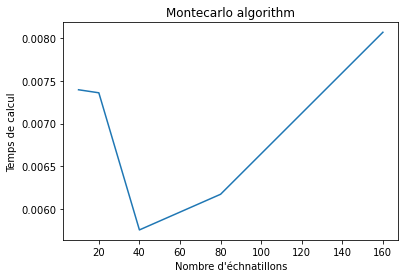

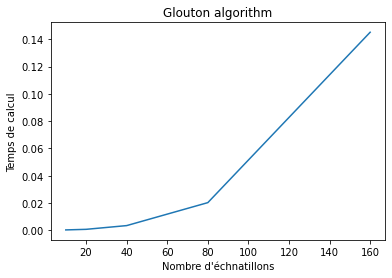

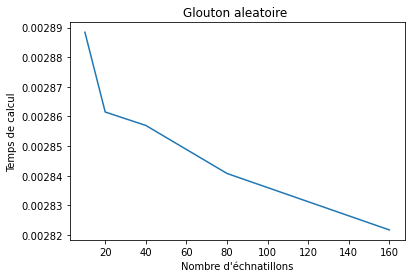

In [180]:

plot_time(temps_mc,liste,'Montecarlo algorithm')

plot_time(temps_gl,liste,'Glouton algorithm')

plot_time(temps_gl_alea,liste,'Glouton aleatoire ')

